# Задача 4

Гипотезы:

- $H_{0}$: $k = 0$,
- $H_{1}$: $k > 0$.

Критерий:
- $H_{0}$: $T(X_{test}) \leq q_{0.95}$, $q_{0.95}$ $-$ 95 перцентиль распределения статистики $T$ при $k = 0$;
- $H_{1}$: $T(X_{test}) > q_{0.95}$. 

$ T(X) = max(|\frac{x_{1}}{x_{sum}} - 0.15|, |\frac{x_{2}}{x_{sum}} - 0.2|, |\frac{x_{3}}{x_{sum}} - 0.3|, |\frac{x_{4}}{x_{sum}} - 0.35|) $

Мощность равна:
$power(k) = P(T(X_{test}) > q_{0.95}) = 1 - F_{X_{test}}(q_{0.95})$

In [20]:
from scipy.spatial.distance import chebyshev, euclidean
from typing import Listx`
import numpy as np
import sys
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


def test_statisctic(X: List) -> float:
    # return chebyshev([x / sum(X) for x in X], [0.15, 0.2, 0.3, 0.35])
    return euclidean([x / sum(X) for x in X], [0.15, 0.2, 0.3, 0.35])


def test(n: int, alpha: float, X_test: List) -> [0, 1]:
    threshold = np.percentile(a=[test_statisctic(rv) for rv in multinomial.rvs(n, p=[0.15, 0.2, 0.3, 0.35], size=10000)], q=95)
    return 0 if test_statisctic(X_test) <= threshold else 1


def set_plot_style(title='', xlabel='', ylabel='', is_single=True):
    if is_single:
        plt.figure(figsize=(10, 8))

    sns.set_theme(context='notebook', 
        palette='pastel',
        font='arial',
        font_scale=1.5)

    if is_single:
        plt.grid(True, linestyle='-.')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.minorticks_on()

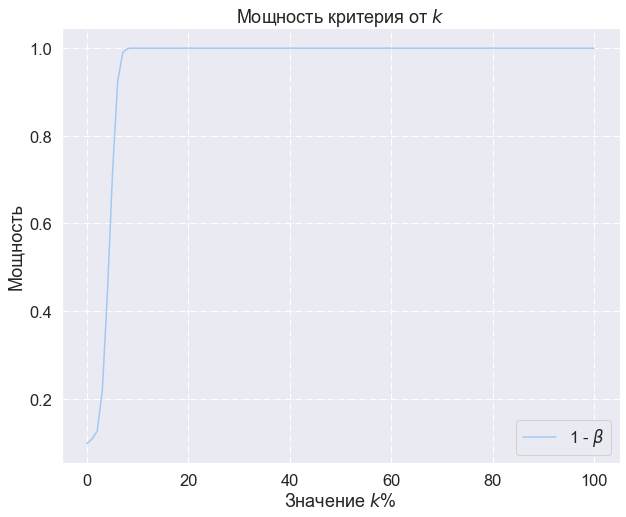

In [21]:
x1, x2, x3, x4 = 0.15, 0.2, 0.3, 0.35

xs = []
ys = []

np.random.seed(100500)
threshold = np.percentile(a=[test_statisctic(rv) for rv in multinomial.rvs(100, p=[0.15, 0.2, 0.3, 0.35], size=10000)], q=95)

# for k in tqdm(np.linspace(0, 1, 100)):
for k in np.linspace(0, 1, 100):
    xs.append(k * 100)
    
    x1, x2, x3, x4 = (x1 + k) / (k + 1), x2 / (k + 1), \
        x3 / (k + 1), x4 / (k + 1)
    
    test_x = np.array([test_statisctic(rv) for rv in multinomial.rvs(100, p=[x1, x2, x3, x4], size=10000)])
    
    ys.append(sum(test_x[test_x > threshold]) / sum(test_x))

set_plot_style('Мощность критерия от $k$', 'Значение $k$%', 'Мощность')
plt.plot(xs, ys, label=r"1 - $\beta$")
plt.legend()
plt.show()